# Notebook for division into Financial, Health and Trade help

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from scripts import *
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

In [2]:
raw_df = pd.read_csv('../data/country-data.csv')
raw_df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


# Financial

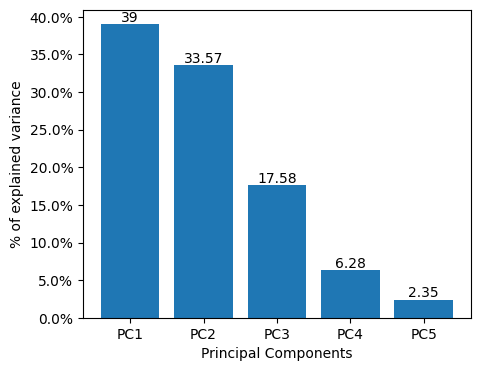

,PC1,PC2,PC3,PC4,PC5
0,-0.195036,-0.220794,-0.015943,-0.032891,0.058133
1,-0.110197,-0.009400,0.020813,-0.047157,0.005184
2,-0.128529,0.192733,-0.040636,0.081497,-0.034892
3,-0.067770,-0.201844,0.080470,0.160326,-0.035397
4,0.034598,0.006343,0.065232,-0.053203,-0.006472


In [112]:
scaler = 'minmax'
raw_df_financial = raw_df.drop(columns=["child_mort", "life_expec", "total_fer", "health"])
#countries, df_financial, pca = pre_process_data(raw_df_financial, pca=True, scaler=scaler, pca_components=4, plot_scree_plot=True, biplot=True)
countries, df_financial, pca_explained = pre_process_data(raw_df_financial, pca=True, scaler=scaler, plot_scree_plot=True, biplot=False, pca_components=5)
df_financial.head()

In [4]:
pca_explained

,exports,health,imports,income,inflation,gdpp
PC1,0.350155,0.263638,0.214971,0.561591,-0.115348,0.658015
PC2,0.512531,-0.738886,0.402735,0.058141,0.066211,-0.146285
PC3,-0.232845,-0.526611,-0.652800,0.357682,0.194140,0.276927
PC4,0.174179,0.227674,0.028489,0.002094,0.957220,-0.027204
PC5,-0.589813,-0.233227,0.512101,-0.260881,0.162083,0.491069
PC6,-0.426930,0.031498,0.319975,0.696588,0.045605,-0.476487


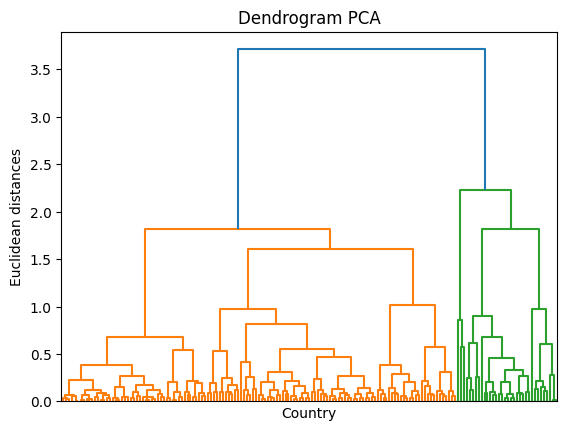

In [5]:
df_financial.index = raw_df.country
df_financial.drop(columns=["PC4", "PC5", "PC6"], inplace=True)
dendrogram = create_dendrogram(df_financial) # finding the optimal number of clusters using dendrogram
plt.title('Dendrogram PCA') # title of the dendrogram
plt.xlabel('Country') # label of the x-axis
plt.ylabel('Euclidean distances') # label of the y-axis
plt.xticks([])
plt.show()

In [6]:
df_financial_h_clustering = apply_hierarchical_clustering(df_financial, 2)
df_financial_h_clustering

,PC1,PC2,PC3,cluster
country,,,,
Afghanistan,-0.194283,-0.108389,-0.055808,1
Albania,-0.110002,-0.010448,-0.032559,1
Algeria,-0.148682,0.093662,0.128124,1
Angola,-0.158391,0.244070,0.089041,1
Antigua and Barbuda,0.020450,0.073248,-0.032250,1
...,...,...,...,...
Vanuatu,-0.130207,0.103593,-0.053452,1
Venezuela,-0.129691,0.009637,0.254940,1
Vietnam,-0.039251,0.168216,-0.221241,1


In [7]:
s= cal_silhouette(df_financial_h_clustering.reset_index(drop=True))
print(s)

0.47744666883089176


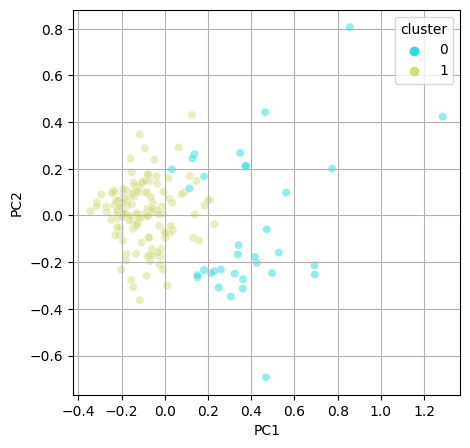

In [8]:
import seaborn as sns
plt.figure(figsize=(5,5), dpi=100)
sns.scatterplot(x='PC1', y='PC2', data=df_financial_h_clustering, hue='cluster', palette='rainbow', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.show()

In [9]:
import geopandas
import folium
from datetime import datetime
from scripts import create_map_plot

#df_financial_h_clustering["name"] = df_financial_h_clustering.index
df_financial_h_clustering["country"] = df_financial_h_clustering.index
df_financial_h_clustering.reset_index(drop=True, inplace=True)
create_map_plot(df_financial_h_clustering)

In [32]:
_list = df_financial_h_clustering['cluster'].tolist()
raw_df['cluster'] = _list
raw_df.groupby(raw_df['cluster']).mean()

/var/folders/bv/mvwnb3fd1rdbr345qwm8mqb40000gn/T/ipykernel_8286/2683902371.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  raw_df.groupby(raw_df['cluster']).mean()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster,,,,,,,,,
0,47.707874,35.547236,6.312677,45.670598,8438.291339,9.024362,67.813386,3.277795,4342.629921
1,8.305000,58.767500,8.412750,50.762500,44787.500000,3.836800,79.262500,1.900750,40337.500000


In [33]:
raw_df.loc[raw_df["cluster"] == 1].head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,1
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,1
10,Bahamas,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28000,1
11,Bahrain,8.6,69.5,4.97,50.9,41100,7.440,76.0,2.16,20700,1
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,1


In [15]:
#df_financial = df_financial.drop(columns=["name", "cluster"])
df_financial

,PC1,PC2,PC3,PC4,PC5,PC6
0,-0.194283,-0.108389,-0.055808,0.001011,0.051745,0.034428
1,-0.110002,-0.010448,-0.032559,-0.041839,0.016171,0.029194
2,-0.148682,0.093662,0.128124,0.033384,-0.017762,-0.009478
3,-0.158391,0.244070,0.089041,0.093269,-0.015533,-0.074267
4,0.020450,0.073248,-0.032250,-0.061192,0.016610,0.022929
...,...,...,...,...,...,...
162,-0.130207,0.103593,-0.053452,-0.059723,-0.001208,-0.040317
163,-0.129691,0.009637,0.254940,0.294291,0.039550,-0.020666
164,-0.039251,0.168216,-0.221241,0.073729,-0.015047,-0.020695
165,-0.208933,0.037741,0.074511,0.107869,0.015344,-0.013706


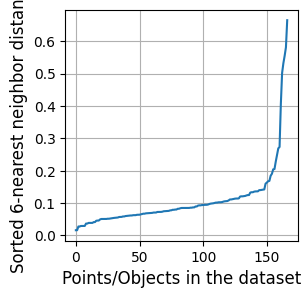

In [16]:
k = 6
neigh = NearestNeighbors(n_neighbors=5) # instanciate NearestNeighbors object
nbrs = neigh.fit(df_financial) # fit the object to the data
distances, indices = nbrs.kneighbors(df_financial)
distances = np.sort(distances, axis=0)[:,1] # sort the distances and keep only the second column

plt.figure(figsize=(3,3))
plt.plot(distances)
plt.xlabel('Points/Objects in the dataset', fontsize=12)
# plt.axhline(y=0.14, linewidth=1, linestyle='dashed', color='k')
plt.ylabel('Sorted {}-nearest neighbor distance'.format(k), fontsize=12)

plt.grid()

In [11]:
df_financial['country'] = raw_df["country"]
components, df_financial_db_clustering = apply_dbscan(df_financial, eps=0.15, min_samples=6)
df_financial_db_clustering

,PC1,PC2,PC3,cluster,country
0,-0.194283,-0.108389,-0.055808,0,Afghanistan
1,-0.110002,-0.010448,-0.032559,0,Albania
2,-0.148682,0.093662,0.128124,0,Algeria
3,-0.158391,0.244070,0.089041,0,Angola
4,0.020450,0.073248,-0.032250,0,Antigua and Barbuda
...,...,...,...,...,...
162,-0.130207,0.103593,-0.053452,0,Vanuatu
163,-0.129691,0.009637,0.254940,0,Venezuela
164,-0.039251,0.168216,-0.221241,0,Vietnam
165,-0.208933,0.037741,0.074511,0,Yemen


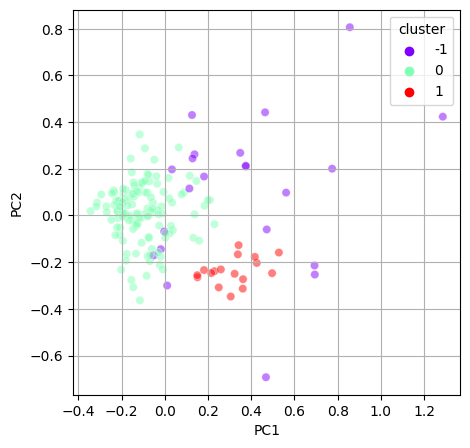

In [12]:
import seaborn as sns
plt.figure(figsize=(5,5), dpi=100)
sns.scatterplot(x='PC1', y='PC2', data=df_financial_db_clustering, hue='cluster', palette='rainbow', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.show()

In [13]:
import geopandas
import folium
from datetime import datetime
from scripts import create_map_plot

#df_financial_h_clustering["country"] = df_financial_h_clustering.index
df_financial_db_clustering.reset_index(drop=True, inplace=True)
create_map_plot(df_financial_db_clustering)

In [30]:
_list = df_financial_db_clustering['cluster'].tolist()
raw_df['cluster'] = _list
raw_df.groupby(raw_df['cluster']).mean()

/var/folders/bv/mvwnb3fd1rdbr345qwm8mqb40000gn/T/ipykernel_8286/187158024.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  raw_df.groupby(raw_df['cluster']).mean()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster,,,,,,,,,
-1,28.037500,59.925000,7.054167,52.408333,42740.416667,15.150583,74.704167,2.713333,33164.125000
0,44.817460,37.473802,6.317619,46.862428,9359.468254,7.288643,68.349206,3.152619,5129.960317
1,4.188235,41.488235,10.170588,39.305882,38711.764706,1.034294,81.052941,1.762353,42511.764706


In [15]:
df_financial_db_clustering.drop(columns=["country"], inplace=True)
s= cal_silhouette(df_financial_db_clustering.reset_index(drop=True))
print(s)

0.4076716818416646


In [39]:
raw_df.loc[raw_df["cluster"] == 0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0


# Health

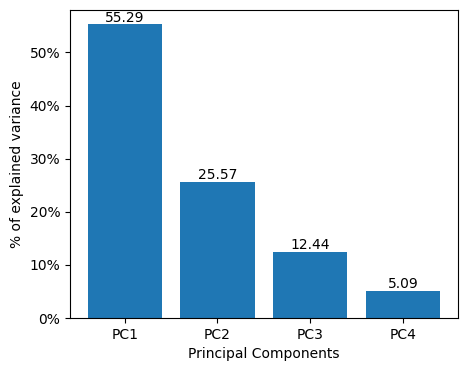

,PC1,PC2,PC3,PC4
0,0.586781,-0.170937,0.087243,-0.055790
1,-0.246532,-0.005109,-0.053741,0.039750
2,-0.086569,0.229749,-0.121131,-0.092340
3,0.704110,-0.097340,-0.181641,-0.099394
4,-0.213162,0.003266,-0.079704,-0.030846


In [125]:
scaler = 'minmax'
raw_df_health = raw_df.drop(columns=["gdpp", "income", "inflation", "imports", "exports"])
#countries, df_health, pca = pre_process_data(raw_df_health, pca=True, scaler=scaler, pca_components=3, plot_scree_plot=True, biplot=True)
countries, df_health, pca = pre_process_data(raw_df_health, pca=True, scaler=scaler, plot_scree_plot=True, biplot=False, pca_components=4)
df_health.head()

In [114]:
#df_health.drop(columns=["country", "cluster"])
df_health

,PC1,PC2,PC3,PC4
0,0.586781,-0.170937,0.087243,-0.055790
1,-0.246532,-0.005109,-0.053741,0.039750
2,-0.086569,0.229749,-0.121131,-0.092340
3,0.704110,-0.097340,-0.181641,-0.099394
4,-0.213162,0.003266,-0.079704,-0.030846
...,...,...,...,...
162,0.044887,0.810009,0.118536,-0.008988
163,-0.136615,0.024264,-0.135869,-0.041891
164,-0.169695,-0.004294,-0.024352,0.056372
165,0.289790,-0.153334,-0.104213,-0.122262


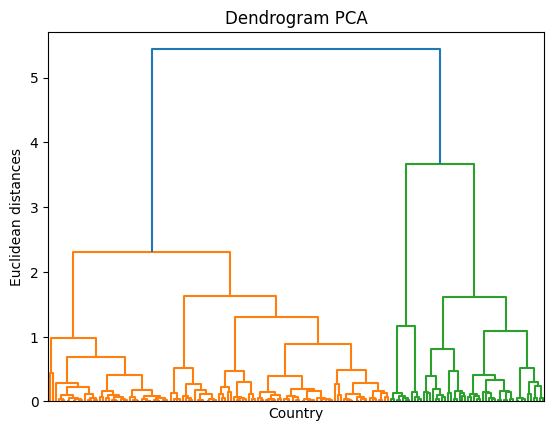

In [115]:
df_health.index = raw_df.country
df_health.drop(columns=["PC4"], inplace=True)
dendrogram = create_dendrogram(df_health) # finding the optimal number of clusters using dendrogram
plt.title('Dendrogram PCA') # title of the dendrogram
plt.xlabel('Country') # label of the x-axis
plt.ylabel('Euclidean distances') # label of the y-axis
plt.xticks([])
plt.show()

In [116]:
df_health_h_clustering = apply_hierarchical_clustering(df_health, 2)
df_health_h_clustering

,PC1,PC2,PC3,cluster
country,,,,
Afghanistan,0.586781,-0.170937,0.087243,0
Albania,-0.246532,-0.005109,-0.053741,1
Algeria,-0.086569,0.229749,-0.121131,1
Angola,0.704110,-0.097340,-0.181641,0
Antigua and Barbuda,-0.213162,0.003266,-0.079704,1
...,...,...,...,...
Vanuatu,0.044887,0.810009,0.118536,0
Venezuela,-0.136615,0.024264,-0.135869,1
Vietnam,-0.169695,-0.004294,-0.024352,1


In [117]:
s= cal_silhouette(df_health_h_clustering.reset_index(drop=True))
print(s)

0.5047527731810348


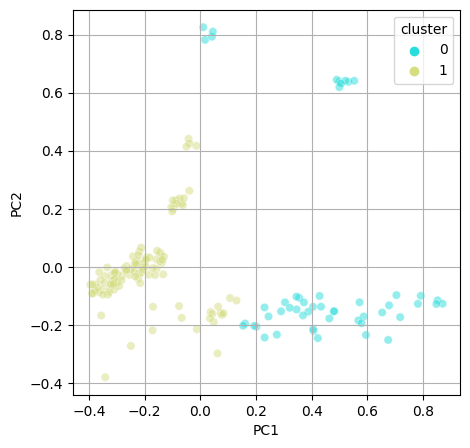

In [118]:
import seaborn as sns
plt.figure(figsize=(5,5), dpi=100)
sns.scatterplot(df_health_h_clustering, x='PC1', y='PC2', hue='cluster', palette='rainbow', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.show()

In [98]:
import geopandas
import folium
from datetime import datetime
from scripts import create_map_plot

df_health_h_clustering["country"] = df_health_h_clustering.index
df_health_h_clustering.reset_index(drop=True, inplace=True)
create_map_plot(df_health_h_clustering)

In [51]:
_list = df_health_h_clustering['cluster'].tolist()
raw_df['cluster'] = _list
raw_df.groupby(raw_df['cluster']).mean()

/var/folders/bv/mvwnb3fd1rdbr345qwm8mqb40000gn/T/ipykernel_8286/1298342774.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  raw_df.groupby(raw_df['cluster']).mean()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster,,,,,,,,,
0,72.429730,31.798635,6.073108,44.057647,4878.418919,10.998176,62.579730,4.268784,2262.756757
1,11.089247,48.517204,7.406559,49.144086,26904.946237,5.222591,76.902151,1.896989,21479.247312


In [120]:
df_health = df_health.drop(columns=["country", "cluster"])
df_health

,PC1,PC2,PC3,cluster
country,,,,
Afghanistan,0.586781,-0.170937,0.087243,0
Albania,-0.246532,-0.005109,-0.053741,1
Algeria,-0.086569,0.229749,-0.121131,1
Angola,0.704110,-0.097340,-0.181641,0
Antigua and Barbuda,-0.213162,0.003266,-0.079704,1
...,...,...,...,...
Vanuatu,0.044887,0.810009,0.118536,0
Venezuela,-0.136615,0.024264,-0.135869,1
Vietnam,-0.169695,-0.004294,-0.024352,1


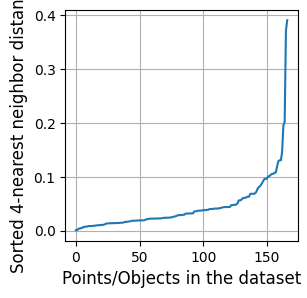

In [121]:
k = 4
neigh = NearestNeighbors(n_neighbors=4) # instanciate NearestNeighbors object
nbrs = neigh.fit(df_health) # fit the object to the data
distances, indices = nbrs.kneighbors(df_health)
distances = np.sort(distances, axis=0)[:,1] # sort the distances and keep only the second column

plt.figure(figsize=(3,3))
plt.plot(distances)
plt.xlabel('Points/Objects in the dataset', fontsize=12)
# plt.axhline(y=0.14, linewidth=1, linestyle='dashed', color='k')
plt.ylabel('Sorted {}-nearest neighbor distance'.format(k), fontsize=12)

plt.grid()

In [122]:
df_health['country'] = raw_df["country"]
components, df_health_db_clustering = apply_dbscan(df_health, eps=0.06, min_samples=6)
df_health_db_clustering

,PC1,PC2,PC3,cluster,country
country,,,,,
Afghanistan,0.586781,-0.170937,0.087243,-1,NaN
Albania,-0.246532,-0.005109,-0.053741,0,NaN
Algeria,-0.086569,0.229749,-0.121131,-1,NaN
Angola,0.704110,-0.097340,-0.181641,-1,NaN
Antigua and Barbuda,-0.213162,0.003266,-0.079704,0,NaN
...,...,...,...,...,...
Vanuatu,0.044887,0.810009,0.118536,-1,NaN
Venezuela,-0.136615,0.024264,-0.135869,0,NaN
Vietnam,-0.169695,-0.004294,-0.024352,0,NaN


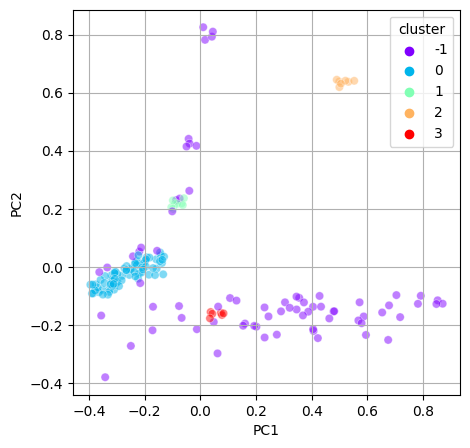

In [123]:
import seaborn as sns
plt.figure(figsize=(5,5), dpi=100)
sns.scatterplot(x='PC1', y='PC2', data=df_health_db_clustering, hue='cluster', palette='rainbow', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.show()

In [55]:
df_health_db_clustering.drop(columns=["country"], inplace=True)

In [56]:
s= cal_silhouette(df_health_db_clustering.reset_index(drop=True))
print(s)

0.20933656566918382


In [109]:
#df_health_db_clustering["country"] = df_health_db_clustering.index
#df_health_db_clustering.reset_index(inplace=True)
create_map_plot(df_health_db_clustering)

In [75]:
_list = df_health_db_clustering['cluster'].tolist()
raw_df['cluster'] = _list
raw_df.groupby(raw_df['cluster']).mean()

/var/folders/bv/mvwnb3fd1rdbr345qwm8mqb40000gn/T/ipykernel_19107/1641158829.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  raw_df.groupby(raw_df['cluster']).mean()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster,,,,,,,,,
-1,70.613333,34.221983,6.545500,46.474432,8388.250000,10.27815,63.593333,4.244333,4827.666667
0,9.957500,47.552500,7.589750,48.576250,26622.625000,4.96745,77.092500,1.809875,22120.250000
1,28.183333,40.341667,4.996667,41.783333,12519.166667,9.32925,72.266667,2.621667,5580.000000
2,36.650000,32.520000,4.767500,44.700000,4872.500000,16.41750,67.550000,2.562500,1912.500000
3,101.942857,40.028571,5.361429,40.628571,6495.428571,11.72000,56.014286,5.314286,3230.857143
4,39.825000,28.325000,5.437500,47.875000,3717.500000,6.45500,67.575000,3.487500,2127.000000


In [76]:
raw_df.loc[raw_df["cluster"].isin([-1])]


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.000,7.58,44.9000,1610,9.440,56.2,5.82,553,-1
3,Angola,119.0,62.300,2.85,42.9000,5900,22.400,60.1,6.16,3530,-1
9,Azerbaijan,39.2,54.300,5.88,20.7000,16000,13.800,69.1,1.92,5840,-1
17,Benin,111.0,23.800,4.10,37.2000,1820,0.885,61.8,5.36,758,-1
19,Bolivia,46.6,41.200,4.84,34.3000,5410,8.780,71.6,3.20,1980,-1
21,Botswana,52.5,43.600,8.30,51.3000,13300,8.920,57.1,2.88,6350,-1
25,Burkina Faso,116.0,19.200,6.74,29.6000,1430,6.810,57.9,5.87,575,-1
26,Burundi,93.6,8.920,11.60,39.2000,764,12.300,57.7,6.26,231,-1
27,Cambodia,44.4,54.100,5.68,59.5000,2520,3.120,66.1,2.88,786,-1
31,Central African Republic,149.0,11.800,3.98,26.5000,888,2.010,47.5,5.21,446,-1


# Trade

In [77]:
scaler = 'minmax'
raw_df_trade = raw_df.drop(columns=["country", "child_mort", "life_expec", "total_fer", "gdpp", "income", "inflation", "health"])
raw_df_trade["trade_ratio"] = raw_df_trade["imports"] / raw_df_trade["imports"].mean() + raw_df_trade["exports"] / raw_df_trade["exports"].mean()
scaler = MinMaxScaler()
df_trade = pd.DataFrame(scaler.fit_transform(raw_df_trade), columns=raw_df_trade.columns)
df_trade

,exports,imports,trade_ratio
0,0.049482,0.257765,0.139614
1,0.139531,0.279037,0.199901
2,0.191559,0.180149,0.186622
3,0.311125,0.246266,0.283058
4,0.227079,0.338255,0.275189
...,...,...,...
162,0.232582,0.302609,0.262886
163,0.142032,0.100809,0.124193
164,0.359651,0.460715,0.403386
165,0.149536,0.197397,0.170248


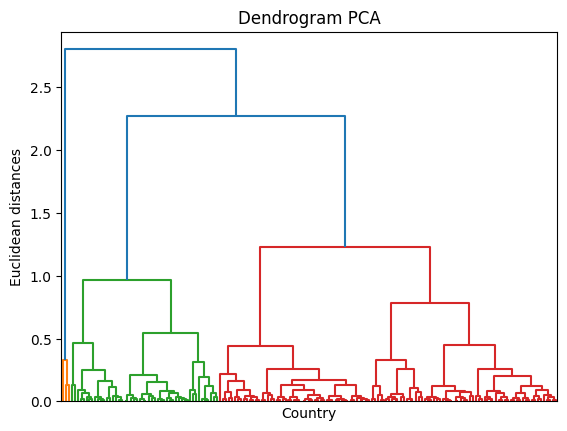

In [78]:
df_trade.index = raw_df.country
dendrogram = create_dendrogram(df_trade) # finding the optimal number of clusters using dendrogram
plt.title('Dendrogram PCA') # title of the dendrogram
plt.xlabel('Country') # label of the x-axis
plt.ylabel('Euclidean distances') # label of the y-axis
plt.xticks([])
plt.show()

In [79]:
df_trade_clustering = apply_hierarchical_clustering(df_trade, 3)
df_trade_clustering

,exports,imports,trade_ratio,cluster
country,,,,
Afghanistan,0.049482,0.257765,0.139614,0
Albania,0.139531,0.279037,0.199901,0
Algeria,0.191559,0.180149,0.186622,0
Angola,0.311125,0.246266,0.283058,0
Antigua and Barbuda,0.227079,0.338255,0.275189,2
...,...,...,...,...
Vanuatu,0.232582,0.302609,0.262886,2
Venezuela,0.142032,0.100809,0.124193,0
Vietnam,0.359651,0.460715,0.403386,2


In [80]:
s, c, d = evalutate_clusters(df_trade_clustering.reset_index(drop=True))
print(s)

0.4590933232327611


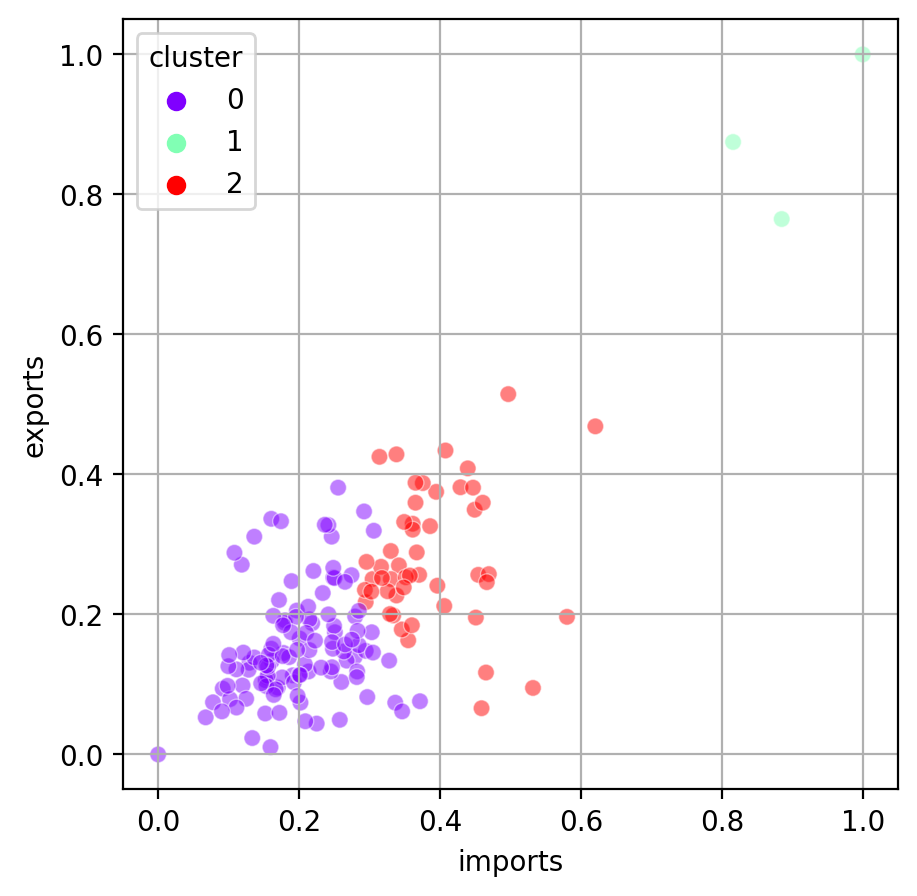

In [81]:
import seaborn as sns
plt.figure(figsize=(5,5), dpi=200)
sns.scatterplot(df_trade_clustering, x='imports', y="exports", hue='cluster', palette='rainbow', alpha=0.5)
plt.xlabel('imports')
plt.ylabel('exports')
plt.grid()
plt.show()

In [82]:
import geopandas
import folium
from datetime import datetime
from scripts import create_map_plot

df_trade_clustering["name"] = df_trade_clustering.index

create_map_plot(df_trade_clustering, "../out/Kamil/trade")

In [86]:
_list = df_trade_clustering['cluster'].tolist()
raw_df['cluster'] = _list
raw_df.groupby(raw_df['cluster']).mean()

/var/folders/bv/mvwnb3fd1rdbr345qwm8mqb40000gn/T/ipykernel_88178/2690413889.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  raw_df.groupby(raw_df['cluster']).mean()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster,,,,,,,,,
0,43.784211,30.860518,6.708158,35.014613,16875.289474,8.875219,70.150877,3.173421,13140.903509
1,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667
2,27.746000,56.382000,7.062200,67.380000,14945.600000,5.607740,70.826000,2.528000,9885.020000
